In [6]:
# importing module 
import youtube_dl 

ydl_opts = {} 

def dwl_vid(): 
	with youtube_dl.YoutubeDL(ydl_opts) as ydl: 
		ydl.download([zxt]) 

channel = 1
while (channel == int(1)): 
	link_of_the_video = input("Copy & paste the URL of the YouTube video you want to download:- ") 
	zxt = link_of_the_video.strip() 

	dwl_vid() 
	channel = int(input("Enter 1 if you want to download more videos \nEnter 0 if you are done ")) 


Copy & paste the URL of the YouTube video you want to download:- https://www.youtube.com/watch?v=pIlZZE_kkoQ
[youtube] pIlZZE_kkoQ: Downloading webpage
[download] Destination: India vs new Zealand 1st T20 highlights 2020 _ ind vs nz 1st T20 highlights-pIlZZE_kkoQ.mp4
[download] 100% of 75.32MiB in 00:40                  
Enter 1 if you want to download more videos 
Enter 0 if you are done 0


In [7]:
# Python code to convert video to audio 
import moviepy.editor as mp 

# Insert Local Video File Path 
clip = mp.VideoFileClip(r"india.mp4") 

# Insert Local Audio File Path 
clip.audio.write_audiofile(r"file.wav") 


chunk:   0%|                                                                         | 0/26437 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in file.wav


MoviePy - Done.


In [36]:
path='N:/major_project/newp/'
filename='file.wav'
import librosa
x, sr = librosa.load(path+filename,sr=16000)

In [37]:
int(librosa.get_duration(x, sr)/60)

19

In [38]:
max_slice=5
window_length = max_slice * sr

In [39]:
import IPython.display as ipd
a=x[21*window_length:22*window_length]
ipd.Audio(a, rate=sr)

In [41]:
energy = sum(abs(a**2))
print(energy)

730.8172167258342


In [42]:
len(a)

80000

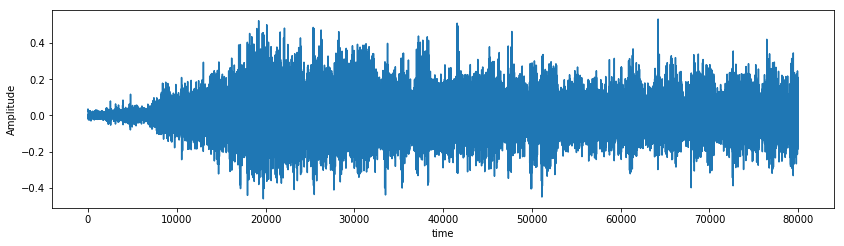

In [43]:
energy = sum(abs(a**2))
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(14, 8)) 
ax1 = fig.add_subplot(211) 
ax1.set_xlabel('time') 
ax1.set_ylabel('Amplitude') 
ax1.plot(a)

In [44]:
import numpy as np
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

In [45]:
energy

array([142.89768669, 118.04064335, 285.86601663, 652.09849365,
       318.00652512, 464.87620522, 443.55759831, 446.17056051,
       703.98295152, 507.24435891, 392.67499301, 525.74515473,
       377.29960118, 402.0851247 , 342.21657901, 442.65801952,
       340.17966816, 570.00214162, 377.34217706, 329.02678404,
       279.89828942, 730.81721673, 498.57563221, 451.94162659,
       471.96355313, 415.7259249 , 437.89340895, 448.55660521,
       482.62666683, 448.1678359 , 361.82517533, 265.51721819,
       345.79947079, 412.15736377, 449.26711889, 463.73176733,
       406.96666166, 326.83701407, 315.31365105, 400.13092461,
       393.2140512 , 563.02395668, 495.80872033, 279.51730143,
       399.64310664, 323.26839941, 374.71114841, 457.13876917,
       281.66378462, 524.74235937, 508.64249738, 475.73576035,
       618.44181576, 512.93861465, 390.91655758, 182.17521418,
       273.81191487, 186.65473694, 345.93063251, 344.73231408,
       577.27060393, 268.25239775, 261.37719429, 135.03

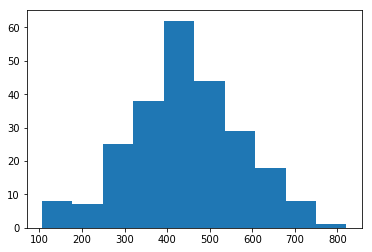

In [46]:
import matplotlib.pyplot as plt 
plt.hist(energy) 
plt.show()

In [61]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])

In [75]:
thresh=600
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        i=np.where(energy == value)[0]
        df.loc[row_index,'energy']=value
        df.loc[row_index,'start']=i[0] * 5
        df.loc[row_index,'end']=(i[0]+1) * 5
        row_index= row_index + 1

In [76]:
df

,energy,start,end
0,652.098,15,20
1,703.983,40,45
2,730.817,105,110
3,618.442,260,265
4,600.006,390,395
5,612.548,420,425
6,600.336,430,435
7,614.239,440,445
8,612.513,475,480
9,608.057,495,500


In [77]:
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
  j=i+1
  while(j<=m):
    if(df['end'][i] == df['start'][j]):
      df.loc[i,'end'] = df.loc[j,'end']
      temp.append(j)
      j=j+1
    else:
      i=j
      break  
df.drop(temp,axis=0,inplace=True)

In [78]:
df

,energy,start,end
0,652.098,15,20
1,703.983,40,45
2,730.817,105,110
3,618.442,260,265
4,600.006,390,395
5,612.548,420,425
6,600.336,430,435
7,614.239,440,445
8,612.513,475,480
9,608.057,495,500


In [82]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
filelist=list()
for i in range(len(df)):
    if(i!=0):
        start_lim = start[i] - 5
    else:
        start_lim = start[i] 
    end_lim   = end[i]   
    filename="N:/major_project/newp/c/" + str(i+1) + ".mp4"
    filelist.append(filename)
    ffmpeg_extract_subclip(path+"india.mp4",start_lim,end_lim,targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

In [83]:
filelist

['N:/major_project/newp/c/1.mp4',
 'N:/major_project/newp/c/2.mp4',
 'N:/major_project/newp/c/3.mp4',
 'N:/major_project/newp/c/4.mp4',
 'N:/major_project/newp/c/5.mp4',
 'N:/major_project/newp/c/6.mp4',
 'N:/major_project/newp/c/7.mp4',
 'N:/major_project/newp/c/8.mp4',
 'N:/major_project/newp/c/9.mp4',
 'N:/major_project/newp/c/10.mp4',
 'N:/major_project/newp/c/11.mp4',
 'N:/major_project/newp/c/12.mp4',
 'N:/major_project/newp/c/13.mp4',
 'N:/major_project/newp/c/14.mp4',
 'N:/major_project/newp/c/15.mp4',
 'N:/major_project/newp/c/16.mp4',
 'N:/major_project/newp/c/17.mp4',
 'N:/major_project/newp/c/18.mp4',
 'N:/major_project/newp/c/19.mp4',
 'N:/major_project/newp/c/20.mp4',
 'N:/major_project/newp/c/21.mp4',
 'N:/major_project/newp/c/22.mp4',
 'N:/major_project/newp/c/23.mp4',
 'N:/major_project/newp/c/24.mp4',
 'N:/major_project/newp/c/25.mp4',
 'N:/major_project/newp/c/26.mp4']

In [86]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip=list()
for i in filelist:
    
    clip1 = VideoFileClip(i)
    clip.append(clip1)
#clip2 = VideoFileClip("myvideo2.mp4").subclip(50,60)
#clip3 = VideoFileClip(filelist[1])
final_clip = concatenate_videoclips(clip)
final_clip.write_videofile("my_concat.mp4")

Moviepy - Building video my_concat.mp4.
MoviePy - Writing audio in my_concatTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                              | 0/7407 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video my_concat.mp4



Moviepy - Done !
Moviepy - video ready my_concat.mp4
